# Analysis of Police Incidents at City Level 

### Description: 

* Are the particular annual trends of police incidents at city level?
* Has the mix of categories changed at zip level code during the study period?

For that we look at the:
* 1) Which are the top 10 crimes?

* 2) Total number of incidents by year.

* 3) Percentage of incidents by categoy in a specific period of time ( by year )? 


### Dependencies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

### Read main_data.zip dataset

The useful library zipfile allows to read big files 10x faster than read_csv alone.

In [2]:
data_zip_path = 'data/main-data.zip'
zf = zipfile.ZipFile(data_zip_path) # having Police_Incidents.csv zipped file.
data_df = pd.read_csv(zf.open('main-data.csv'))
data_df.dtypes

id              int64
year            int64
month           int64
day_m           int64
day_w          object
time           object
category       object
meta_cat       object
resolution     object
location       object
lat           float64
lng           float64
zipcode         int64
dtype: object

In [3]:
main_df = data_df.drop(['day_w', 'time', 'location', 'zipcode', 'lat', 'lng', 'resolution'], axis=1)
main_df.shape

(1169076, 6)

In [7]:
# We take a look at the top 10 categories. 
# We have not ineterested on categories 'Other Offenses' and 'Non-criminal', because it is not personal and public safety.

categories = ['LARCENY/THEFT', 'ASSAULT', 'VANDALISM', 'WARRANTS', 'VEHICLE THEFT', 'SUSPICIOUS OCC', 
              'BURGLARY', 'DRUG/NARCOTIC', 'ROBBERY', 'FRAUD']

subset_df = main_df[main_df.category.isin(categories)]


###  Have the incidents increased or decreased by year?

We create an overview table to summarize the total of incidents  by category at city level every year. Our period of time runs from 2010 to 2017.

We take a look at the top 13 categories. We have not ineterested on categories 'Other Offenses' and 'Non-criminal', because it is not personal and public safety.


In [8]:
# Get the totals of each category per year, and find which are the top 13.

group_cat_y = subset_df.groupby(['category', 'year'])
cat_year_df = group_cat_y["id"].size()
cat_year_df = cat_year_df.unstack()
cat_year_df= cat_year_df.fillna(0)
cat_year_df.stack()
top10_df = cat_year_df.nlargest(13,2010)

# Save to a csv files.
top10_df.to_csv('output/top13_categories_year.csv')

top10_df

year,2010,2011,2012,2013,2014,2015,2016,2017
category,,,,,,,,
LARCENY/THEFT,24446,25905,30976,36412,38003,42068,40448,46834
ASSAULT,12387,12279,12181,12580,12402,13115,13602,13463
DRUG/NARCOTIC,9205,6935,6444,6775,5408,4251,4246,3252
VANDALISM,7934,7243,7808,6921,7165,7675,8595,9616
WARRANTS,6187,6311,6300,7362,6726,6815,5975,4897
SUSPICIOUS OCC,6004,6207,5860,5677,5230,5500,5801,6008
BURGLARY,4966,4987,6243,6195,6066,5931,5812,5719
VEHICLE THEFT,4346,4762,6183,6241,7108,7943,6422,5646
ROBBERY,3324,3376,3955,4196,3420,3759,3300,3313


## Are the particular trends of police incidents at city level?

In [9]:
# Pivot Table at City Level for obtaining the totals for each category every single year from 2010 to 2017.

pvt_cat_year = subset_df.pivot_table(index=['year'], 
                                     columns=['category'], 
                                     values='id',  
                                     aggfunc='count', 
                                     fill_value=0)

# Save to a csv files.
pvt_cat_year.to_csv('output/top10_categories_year.csv')

pvt_cat_year

category,ASSAULT,BURGLARY,DRUG/NARCOTIC,FRAUD,LARCENY/THEFT,ROBBERY,SUSPICIOUS OCC,VANDALISM,VEHICLE THEFT,WARRANTS
year,,,,,,,,,,
2010,12387,4966,9205,2656,24446,3324,6004,7934,4346,6187
2011,12279,4987,6935,2756,25905,3376,6207,7243,4762,6311
2012,12181,6243,6444,2698,30976,3955,5860,7808,6183,6300
2013,12580,6195,6775,2752,36412,4196,5677,6921,6241,7362
2014,12402,6066,5408,2988,38003,3420,5230,7165,7108,6726
2015,13115,5931,4251,3136,42068,3759,5500,7675,7943,6815
2016,13602,5812,4246,2650,40448,3300,5801,8595,6422,5975
2017,13463,5719,3252,2453,46834,3313,6008,9616,5646,4897


In [10]:
# Change pivot table to records, for plotting using seaborn library

# Convert pivot table to records
new_data_df = pd.DataFrame(pvt_cat_year.to_records())

# Save to a csv files.
new_data_df.to_csv('output/top10_categories_year.csv', index=False)

new_data_df.columns = [hdr.replace("('id', ", "").replace(")", "") \
                     for hdr in new_data_df.columns]

new_data_df = new_data_df.melt('year', var_name='cols', value_name='vals')

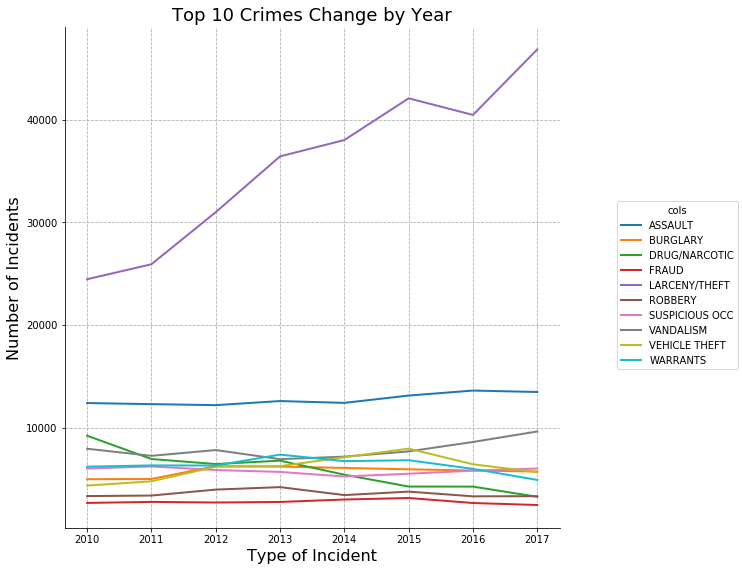

In [11]:
# Graph of Totals incidents by year (Top 10 crimes)

g = sns.FacetGrid(new_data_df, hue="cols", size=6)
g = (g.map(plt.plot, "year", "vals", linewidth=2).add_legend())

fig = plt.gcf()
fig.set_size_inches(11, 8)

#Incorporate the other graph properties

plt.title("Top 10 Crimes Change by Year" , fontsize=18)
plt.ylabel("Number of Incidents", fontsize=16)
plt.xlabel("Type of Incident", fontsize=16)
plt.grid(True, ls='dashed')
plt.savefig('output/top10crimes.png')
plt.show()


##  Conclusions:

The crime "Larceny and theft" has been the most common crime in San Francisco over the period, with more than 24,000 reported incidents in 2010 to 45,000 reported last year.  It has been rising over the years, the next one is Assault with little change, but Drug/Narcotic has decreased on the current decade from 9K to 3K reported incidents. 

We thought that this trend is related at the high inequality of income in San Francisco plus of the increase of population.

In [12]:
# Function for plotting several lines

def plot_func(cat):
    
    plt.plot(pvt_cat_year[cat], marker='o', markersize=8, alpha=0.6, linestyle='dashed', linewidth=1)

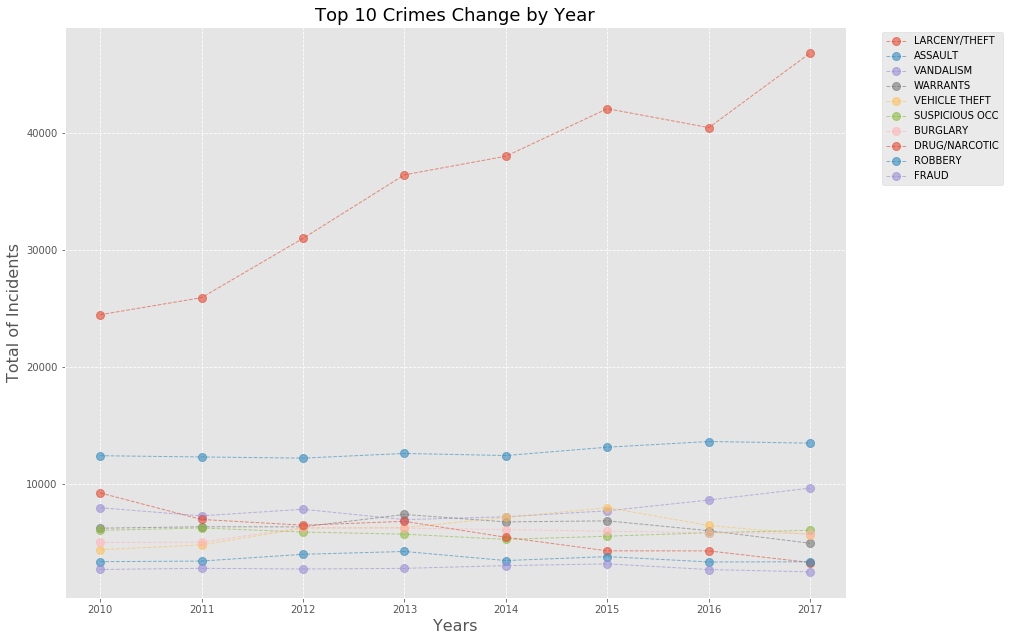

In [13]:
# Graph of Totals incidents by year (Top 10 crimes) 2nd. option.

plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(14, 10.5)

for c in categories:
    plot_func(c)

# Put a legend below current axis
plt.title("Top 10 Crimes Change by Year" , fontsize=18)
plt.ylabel("Total of Incidents", fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.grid(True, ls='dashed')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('output/top10crimes2.png')
plt.show()

###  What is the annual overall rate of change for each crime at city level?

2) Percentage of incidents by categoy in a specific period of time ( by year, by month )


In [14]:
# Total of 10 categories or type of incidents by year. 
# This we usefull for calculating the overall rate of change of each in a particular period of time. 

group_by_year = subset_df.groupby(['year'])
totals_by_year = group_by_year["id"].count()
totals_by_year

year
2010     81455
2011     80761
2012     88648
2013     95111
2014     94516
2015    100193
2016     96851
2017    101201
Name: id, dtype: int64

In [15]:
# Calculate percentage using the Series 'totals_by_year' and the Dataframe top13

years=[2010,2011,2012,2013,2014,2015,2016,2017]

# New dataframe for holding percenatges of each category.
pctg_df = pd.DataFrame()

for y in years:
    # Obtain from series the totals for each year using get method.
    total = totals_by_year.get(y)
    
    # Create the name of the column
    name="pct_" + str(y)
    
    # Apply the totals for each column "Y" in df top10 which has the totals of each crime per year.
    pctg_df[name]  = top10_df[y]/total*100

# Save to a csv files.
pctg_df.to_csv('output/pct_categories_years.csv')

pctg_df

,pct_2010,pct_2011,pct_2012,pct_2013,pct_2014,pct_2015,pct_2016,pct_2017
category,,,,,,,,
LARCENY/THEFT,30.011663,32.076126,34.942695,38.283690,40.208007,41.986965,41.763121,46.278199
ASSAULT,15.207170,15.204121,13.740863,13.226651,13.121588,13.089737,14.044254,13.303228
DRUG/NARCOTIC,11.300718,8.587066,7.269200,7.123256,5.721783,4.242811,4.384054,3.213407
VANDALISM,9.740347,8.968438,8.807869,7.276761,7.580727,7.660216,8.874457,9.501882
WARRANTS,7.595605,7.814415,7.106759,7.740430,7.116255,6.801872,6.169270,4.838885
SUSPICIOUS OCC,7.370941,7.685640,6.610414,5.968815,5.533455,5.489405,5.989613,5.936700
BURGLARY,6.096618,6.175010,7.042460,6.513442,6.417961,5.919575,6.000971,5.651130
VEHICLE THEFT,5.335461,5.896410,6.974777,6.561807,7.520420,7.927700,6.630804,5.578996
ROBBERY,4.080781,4.180236,4.461466,4.411687,3.618435,3.751759,3.407296,3.273683


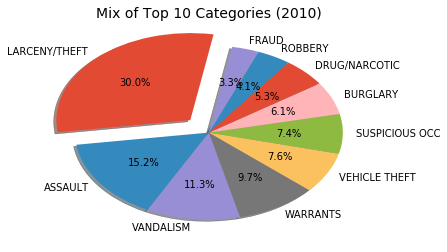

In [16]:
plt.style.use('ggplot')
fig = plt.figure()

plt.title("Mix of Top 10 Categories (2010)", fontsize=14)

# Put a legend below current axis
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(pctg_df['pct_2010'],  labels=categories, 
        autopct="{0:1.1f}%".format, shadow=True, explode=explode, startangle=80)
plt.savefig('output/pctg2010.png')
plt.show()

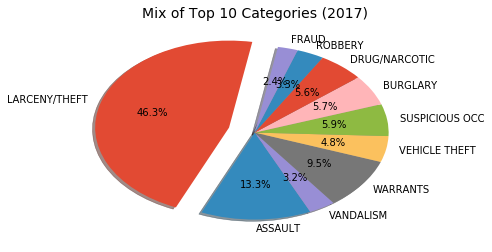

In [17]:
plt.style.use('ggplot')
fig = plt.figure()

plt.title("Mix of Top 10 Categories (2017)", fontsize=14)

# Put a legend below current axis
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(pctg_df['pct_2017'],  labels=categories, 
        autopct="{0:1.1f}%".format, shadow=True, explode=explode, startangle=80)
plt.savefig('output/pctg2017.png')
plt.show()

## Conclusions: 

The trend is corroborated in these pies charts. The most noticeable change is a significant increased in the proportion of Theft incidents. Specifically, the share of related incidents increased from 30% in 2010 to 46% in 2017, which represents approximately 50% of increase. We suspect that the underlying cause for this is increase is likely du to the high inequality of income in San Francisco. 

Another trend relates to the dramatic decrease in drug related incidents. This category decreased from 11% to 3% which is an amost 78% drop. We suspect that this dramatic drop is due to the government policy of recreational cannabis, and California is pushing this legislation, so that, this trend should continue.

In [18]:
# Pivot Table by Meta Category at City Level

pvt_mcy = pd.pivot_table(subset_df, 
                        index=['year'], 
                        columns=['meta_cat'], 
                        values=['id'],
                        aggfunc='count',
                        #margins= True,
                        fill_value=0
                        )

# Save to a csv files.
pvt_mcy.to_csv('output/meta_categories_year.csv')

pvt_mcy

id             
meta_cat     BC     OI    WC
year                        
2010      57403  15392  8660
2011      58552  13246  8963
2012      67346  12744  8558
2013      72545  14137  8429
2014      74164  12134  8218
2015      80491  11066  8636
2016      78179  10221  8451
2017      84591   8149  8461

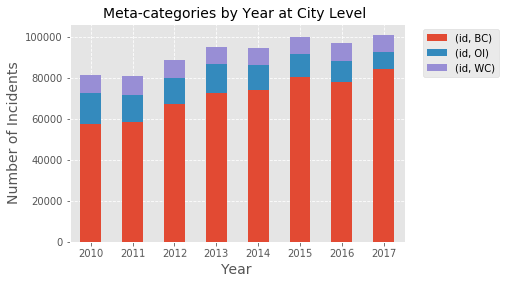

In [19]:
# Graph Change of Meta-categories by year at City Level

plt.style.use('ggplot')
fig = plt.figure()

pvt_mcy.plot(kind='bar',stacked=True)

plt.title("Meta-categories by Year at City Level " , fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.grid(True, ls='dashed')

plt.xticks(rotation=(0.45))
plt.savefig('output/fig6.png')

# Put a legend below current axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('output/mcatyear.png')
plt.show()